# Report structure

## UCI dataset Machine Learning Repo
- netflix dataset article: collaborative filtering -> strategies

## Preprocessing [Doing]
- preprocessing steps: cleaning


## Exploratory Data Analysis [Doing]

Explain how you tried to understand the data, e.g. through plotting or exploratory data analysis. Explain all preprocessing steps taken; e.g. what features did you use, and did you perform any feature transformations, and why were these transformations done?
- data visualisation (several dimensions) through plots
- correlation matrix
- statistical test between features (ANOVA etc)


## Feature selection / engineering
- feature transformation
    - hierarchical clustering (countries -> race?)
    - association rule (age and education VS income = young person with high income -> low ed, older person with high income -> high ed)
    - etc.

## Data Mining
Clearly describe how you ran your classification model(s). You do not need to explain the model itself (e.g. what a random forest is), but should explain all other relevant details for running it. Which approaches did you try? What values did you use for its hyper-parameters (or other choices involved in the model)? How did you select these hyper parameters? 
- models
- gridsearch for parameter tuning

## Evaluation and Interpretation
How did you compare between different approaches? Which approaches performed the best, and why?
- metrics: f1
- K-fold crossvalidation
- which are the most important features?

# Imports and data loading

In [3]:
# Imports
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))
print(list(X_train.columns))
print(X_train.shape, X_test.shape)
train.head()

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
(24421, 13) (24421, 13)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,exceeds50K
0,30,?,147215,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States,0
1,60,Private,173960,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Female,0,0,42,United-States,0
2,52,?,105428,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,12,United-States,0
3,37,Private,112497,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,0,0,60,United-States,0
4,63,Private,137843,Some-college,10,Married-civ-spouse,Sales,Husband,Male,7298,0,48,United-States,1


# Handling missing values

In [5]:
# check for ? values and replace by nan
print("# nan values in train:", train.isna().sum().sum())
print("# nan values in test:", X_test.isna().sum().sum())
# -> no nan values

# check for " ?" values and drop them (???)
print("##### TRAIN #####")
for col in train.columns:
    print(col, len(train[train[col] == ' ?']))
print("##### TEST #####")
for col in X_test.columns:
    print(col, len(X_test[X_test[col] == ' ?']))

train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
X_train = train.drop(["exceeds50K"], axis=1)
print(train.shape, X_train.shape, X_test.shape)

# nan values in train: 0
# nan values in test: 0
##### TRAIN #####
age 0
workclass 1392
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 1399
relationship 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 410
exceeds50K 0
##### TEST #####
age 0
workclass 1407
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 1410
relationship 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 447
(22633, 14) (22633, 13) (22589, 13)


/home/dblux/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


# Feature transformation

In [79]:
# checking that education-num is the encoded version of education, drop education
print(train.groupby(["education-num", "education"]).size().reset_index().rename(columns={0:'count'})) # -> education num = education encoded

    education-num      education  count
0               1      Preschool     37
1               2        1st-4th    113
2               3        5th-6th    219
3               4        7th-8th    423
4               5            9th    325
5               6           10th    612
6               7           11th    765
7               8           12th    297
8               9        HS-grad   7378
9              10   Some-college   4926
10             11      Assoc-voc    990
11             12     Assoc-acdm    761
12             13      Bachelors   3828
13             14        Masters   1270
14             15    Prof-school    413
15             16      Doctorate    276
(22633, 13) (22633, 12) (22589, 12)


In [80]:
print(train["fnlwgt"].describe())  # ?
print(train["capital-gain"].describe())  # ?
print(train["capital-loss"].describe()) # ?

count    22633.000000
mean        38.510626
std         13.146847
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64
count    2.263300e+04
mean     1.889372e+05
std      1.047556e+05
min      1.376900e+04
25%      1.175020e+05
50%      1.779550e+05
75%      2.367690e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64
count    22633.000000
mean        41.022887
std         11.976972
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64
count    22633.000000
mean      1130.005523
std       7638.777059
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64
count    22633.000000
mean        87.269032
std        400.705720
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3900.

17 90
16
nan 19


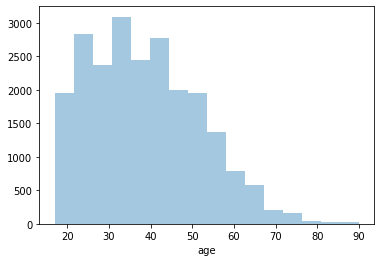

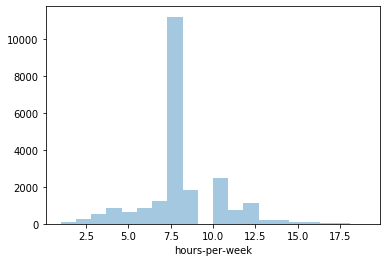

In [88]:
# encode age continuous by intervals of 5 years
print(train["age"].describe())
print(train["age"].min(), train["age"].max())
sns.distplot(train["age"], kde=False, bins=16)
bins = np.arange(15, 95, 5)
print(len(bins))
age_bin = pd.cut(train["age"], bins=bins, labels=np.arange(1, len(bins)), include_lowest=True)

# encode hours-per-week continuous by intervals of 5hours
print(train["hours-per-week"].describe())  # ?
print(train["hours-per-week"].min(), train["hours-per-week"].max())
plt.figure()
sns.distplot(train["hours-per-week"], kde=False, bins=20)
bins = np.arange(1, 100, 5)
print(len(bins))
hours_bin = pd.cut(train["hours-per-week"], bins=bins, labels=np.arange(1, len(bins)), include_lowest=True)

# diff capital-gain and capital-loss
capital_diff = train["capital-gain"] - train["capital-loss"]
sns.distplot(capital_diff, kde=False)

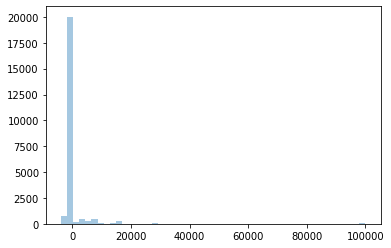

In [61]:
# native country to race ??? -> hierarchical clustering

#regions = {"Western Europe": "England", ""
#           "Europe": "Italy", "Portugal",
#           "Asia high PIB": "Japan", "China",
#           "Asia low PIB": "",
#           
#           "India", 
#          "South America": ]

print(X_train["native-country"].value_counts())

 United-States                 20624
 Mexico                          458
 Philippines                     140
 Germany                         101
 Puerto-Rico                      86
 El-Salvador                      82
 India                            79
 Canada                           75
 Cuba                             69
 England                          55
 Italy                            55
 China                            54
 Jamaica                          52
 Japan                            47
 Guatemala                        46
 South                            46
 Poland                           45
 Columbia                         44
 Dominican-Republic               43
 Vietnam                          40
 Portugal                         38
 Iran                             33
 Haiti                            33
 Taiwan                           30
 Greece                           26
 Peru                             25
 Nicaragua                        25
 

0    75.146909
1    24.853091
Name: exceeds50K, dtype: float64


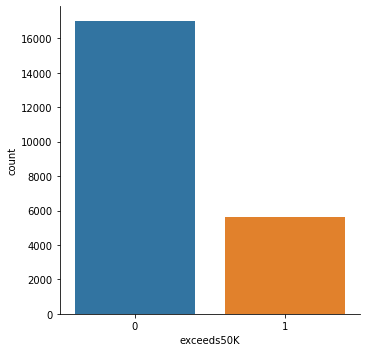

In [62]:
# class label imbalance in train

sns.catplot(x="exceeds50K", kind="count", data=train)
print(train['exceeds50K'].value_counts(normalize=True) * 100)

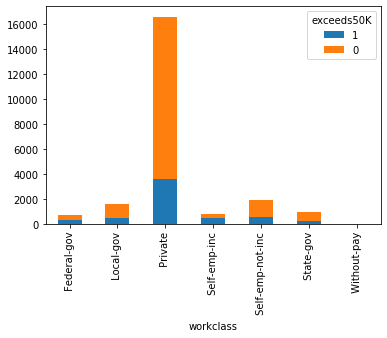

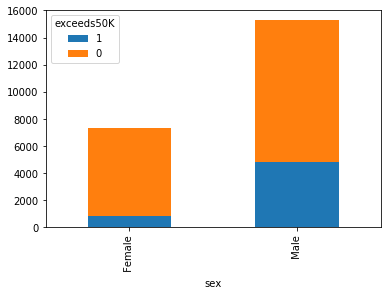

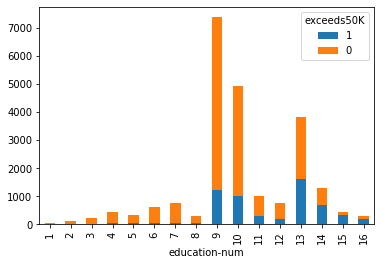

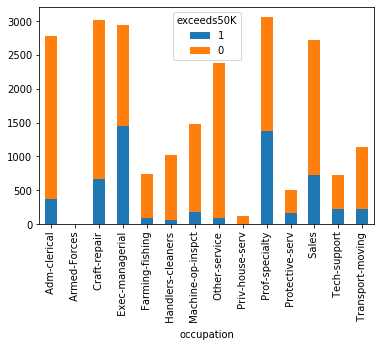

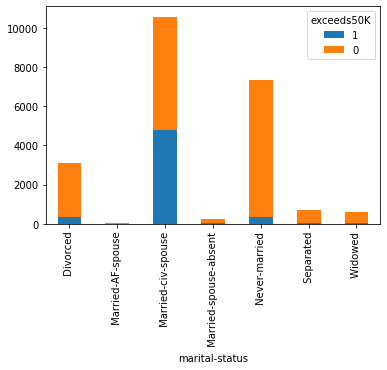

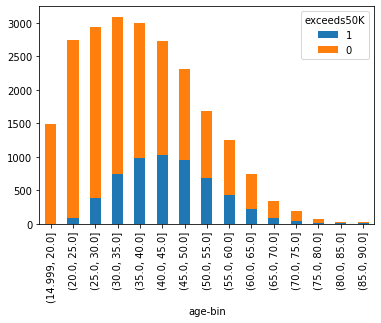

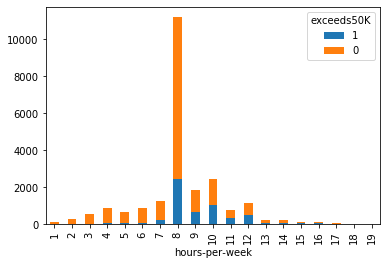

In [112]:
df_plot = train.groupby(['workclass', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='workclass', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True)

#df_plot = train.groupby(['workclass', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='workclass', values=0).sort_index(ascending=False, axis=1)
#s = df_plot["workclass"].value_counts()
#df_plot['prod_count'] = df_plot['prod_count'].div(df2['subset_product'].map(s))
#df_plot.plot(kind='bar', stacked=True)

df_plot = train.groupby(['sex', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='sex', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True)

df_plot = train.groupby(['education-num', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='education-num', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True)

df_plot = train.groupby(['occupation', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='occupation', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True)

df_plot = train.groupby(['marital-status', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='marital-status', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True)

bins = np.arange(15, 95, 5)
train["age-bin"] = pd.cut(train["age"], bins=bins, include_lowest=True)
df_plot = train.groupby(['age-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='age-bin', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True)

bins = np.arange(1, 100, 5)
hours_bin = pd.cut(train["hours-per-week"], bins=bins, include_lowest=True)
df_plot = train.groupby(['hours-per-week', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='hours-per-week', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True)

ValueError: cannot convert float NaN to integer

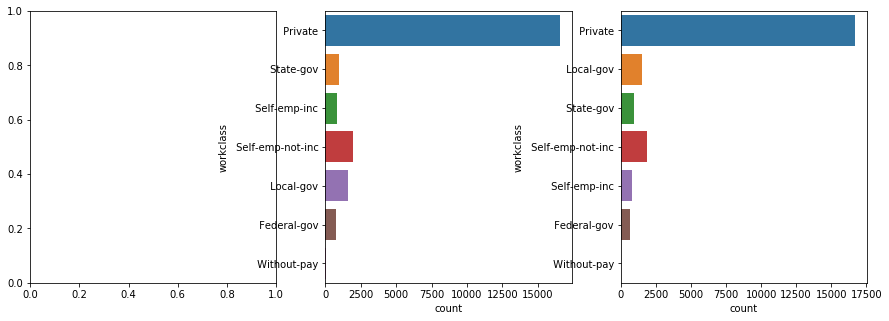

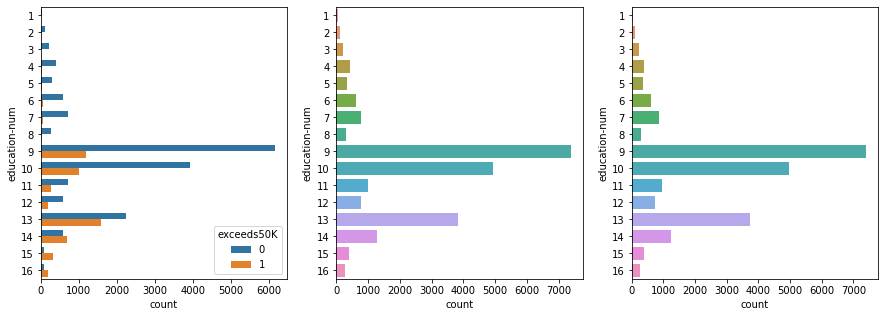

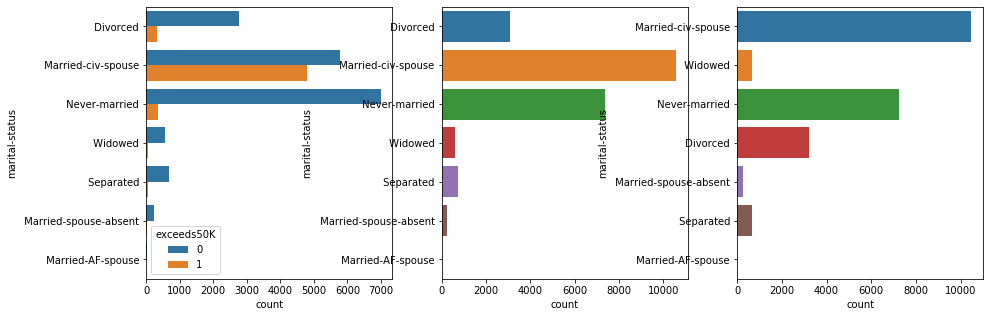

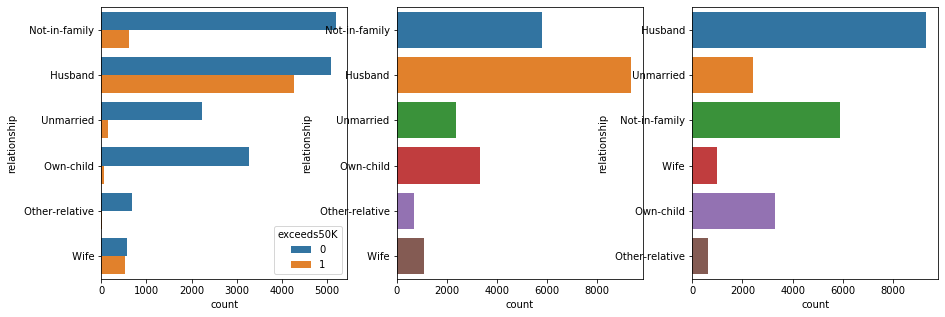

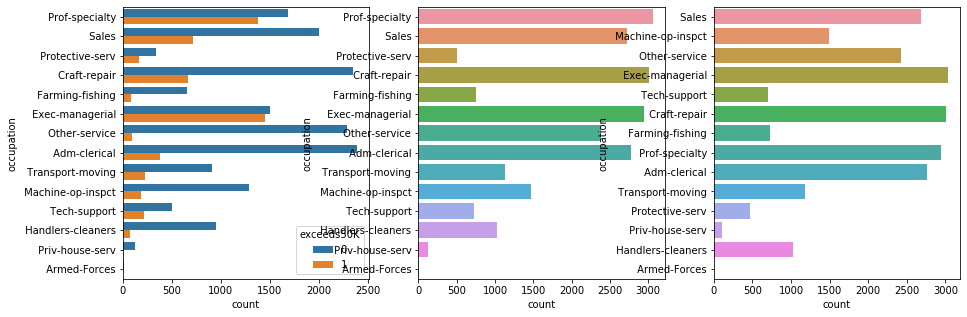

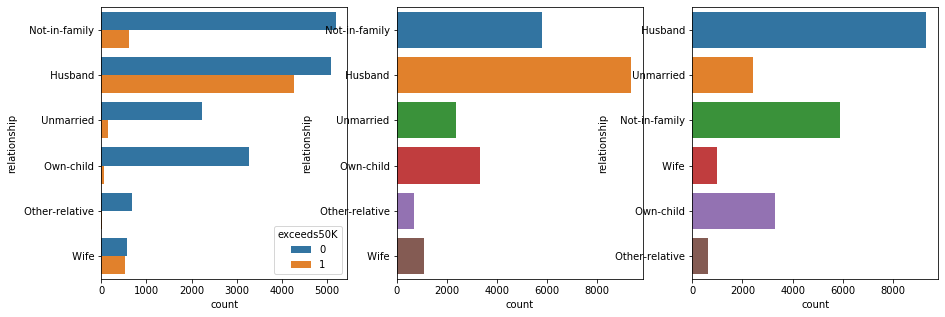

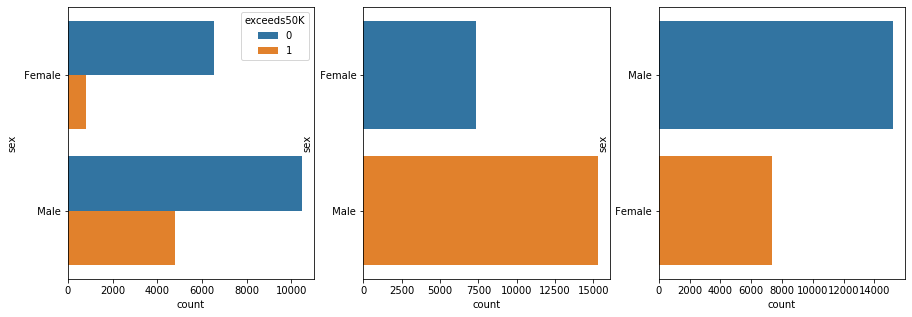

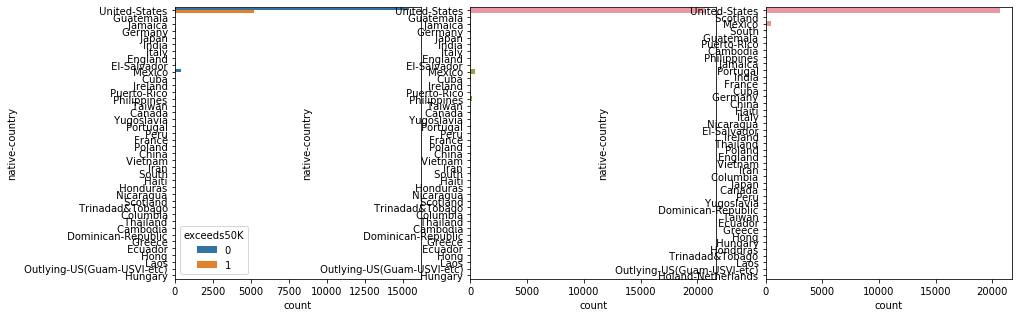

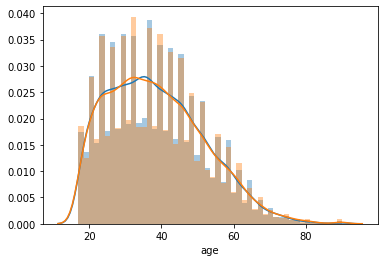

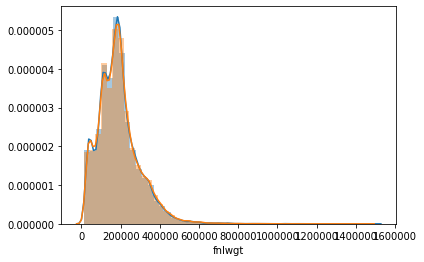

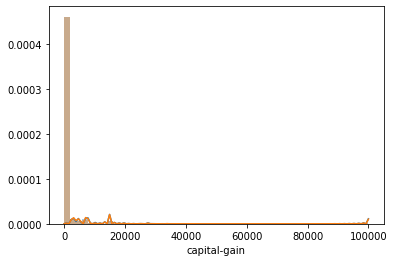

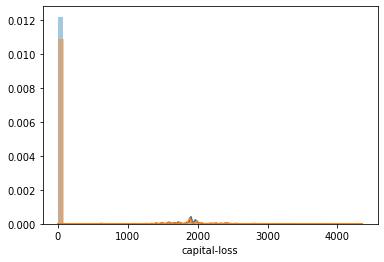

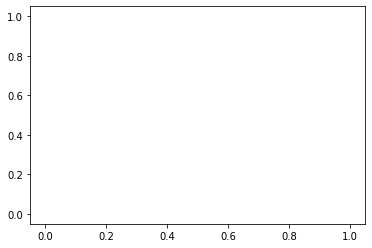

In [65]:
# display each variables category distribution in train and test

fig, ax = plt.subplots(1,3, figsize=(15,5))
df_plot = train.groupby(['workclass', 'exceeds50K']).size().reset_index().pivot(columns='workclass', index='exceeds50K', values=0)
df_plot.plot(kind='bar', stacked=True)
# sns.catplot(y="workclass", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="workclass", kind="count", data=train, ax=ax[1])
sns.catplot(y="workclass", kind="count", data=X_test, ax=ax[2])
plt.close(2)
plt.close(3)
plt.close(4)


fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="education-num", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="education-num", kind="count", data=train, ax=ax[1])
sns.catplot(y="education-num", kind="count", data=X_test, ax=ax[2])
plt.close(3)
plt.close(4)
plt.close(5)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="marital-status", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="marital-status", kind="count", data=train, ax=ax[1])
sns.catplot(y="marital-status", kind="count", data=X_test, ax=ax[2])
plt.close(4)
plt.close(5)
plt.close(6)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="relationship", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="relationship", kind="count", data=train, ax=ax[1])
sns.catplot(y="relationship", kind="count", data=X_test, ax=ax[2])
plt.close(5)
plt.close(6)
plt.close(7)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="occupation", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="occupation", kind="count", data=train, ax=ax[1])
sns.catplot(y="occupation", kind="count", data=X_test, ax=ax[2])
plt.close(6)
plt.close(7)
plt.close(8)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="relationship", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="relationship", kind="count", data=train, ax=ax[1])
sns.catplot(y="relationship", kind="count", data=X_test, ax=ax[2])
plt.close(7)
plt.close(8)
plt.close(9)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="sex", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="sex", kind="count", data=train, ax=ax[1])
sns.catplot(y="sex", kind="count", data=X_test, ax=ax[2])
plt.close(8)
plt.close(9)
plt.close(10)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="native-country", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="native-country", kind="count", data=train, ax=ax[1])
sns.catplot(y="native-country", kind="count", data=X_test, ax=ax[2])
plt.close(9)
plt.close(10)
plt.close(11)

plt.figure()
sns.distplot(train["age"])
sns.distplot(X_test["age"])

plt.figure()
sns.distplot(train["fnlwgt"])
sns.distplot(X_test["fnlwgt"])

plt.figure()
sns.distplot(train["capital-gain"])
sns.distplot(X_test["capital-gain"])

plt.figure()
sns.distplot(train["capital-loss"])
sns.distplot(X_test["capital-loss"])

plt.figure()
sns.distplot(train["hours-per-week"])
sns.distplot(X_test["hours-per-week"])


In [1]:
# frequencies

for col in ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex','native-country']:
    print(col)
    print("TRAIN")
    print(X_train[col].value_counts(normalize=True) * 100)
    print("TEST")
    print(X_test[col].value_counts(normalize=True) * 100)

workclass
TRAIN


NameError: name 'X_train' is not defined

In [ ]:
train[train["native-country"] == " France"]

# Correlations

corr train
(99, 99)
corr test
(99, 99)


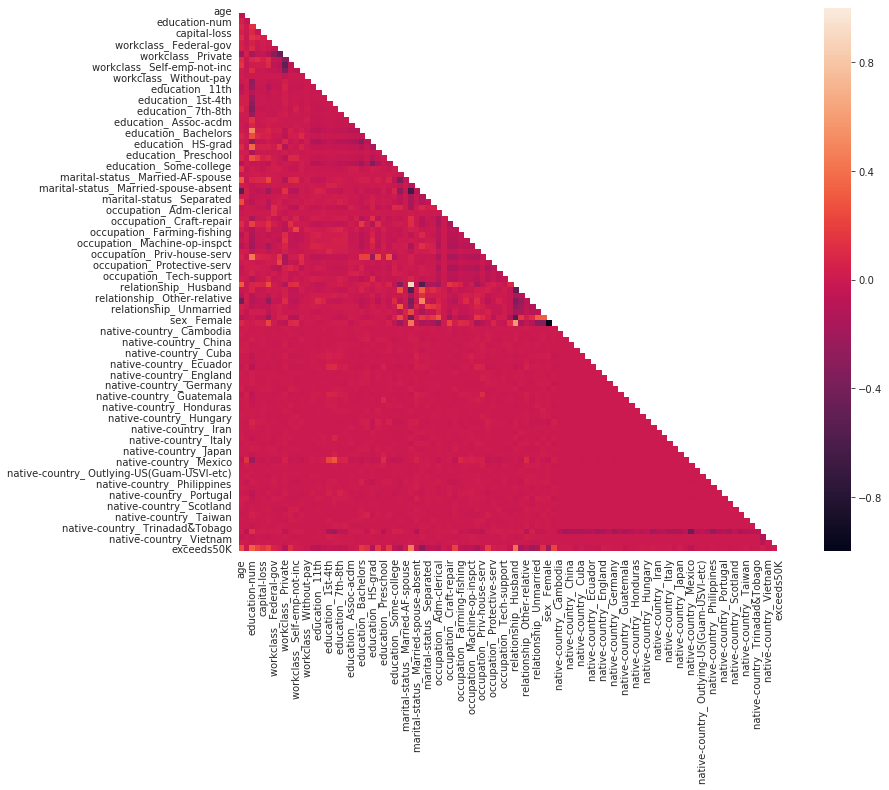

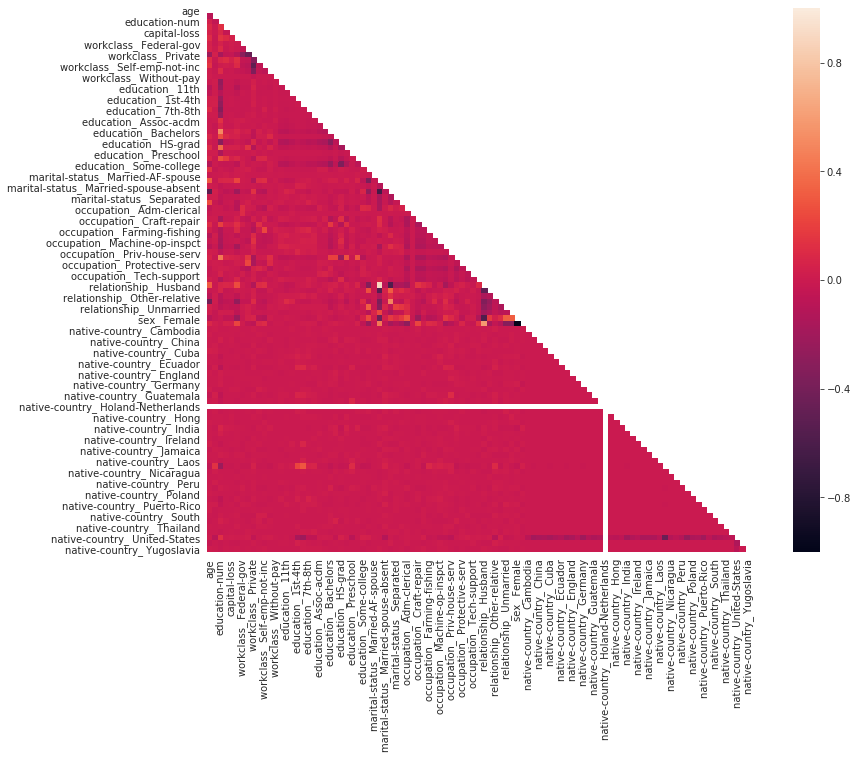

In [4]:
# standardize and plot correlation matrix train

print("corr train")
X_train_encoded = pd.concat([pd.get_dummies(X_train), y_train], axis=1)   # one-hot-encoding
X_train_encoded_norm = StandardScaler().fit_transform(X_train_encoded)  # standadize
X_train_encoded_norm = pd.DataFrame(X_train_encoded_norm, columns=X_train_encoded.columns)

corr = X_train_encoded_norm.corr()
print(corr.shape)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True)

print("corr test")
X_test_encoded = pd.get_dummies(X_test)   # one-hot-encoding
X_test_encoded_norm = StandardScaler().fit_transform(X_test_encoded)  # standadize
X_test_encoded_norm = pd.DataFrame(X_train_encoded_norm, columns=X_test_encoded.columns)

corr_test = X_test_encoded_norm.corr()
print(corr_test.shape)
mask_test = np.zeros_like(corr_test)
mask_test[np.triu_indices_from(mask_test)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr_test, mask=mask_test, vmin=-1, vmax=1, square=True)

# PCA

In [ ]:
# PCA comp 1 and 2, train

X_train_encoded = pd.get_dummies(X_train)  # one-hot-encoding
X_train_encoded_norm = StandardScaler().fit_transform(X_train_encoded)  # standadize before PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(X_train_encoded_norm)
principalComponents = pca.transform(X_train_encoded_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100)])
finalDf = pd.concat([principalDf, train], axis = 1)

markers = {0: "X", 1: "s"}

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    hue="exceeds50K", data=finalDf, legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="sex", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="marital-status", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="education", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="education-num", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="relationship", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="native-country", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="occupation", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


In [ ]:
# PCA comp 2 and 3, train

X_train_encoded = pd.get_dummies(X_train)  # one-hot-encoding
X_train_encoded_norm = StandardScaler().fit_transform(X_train_encoded)  # standadize before PCA

pca = PCA(n_components=3, random_state=0)
pca.fit(X_train_encoded_norm)
principalComponents = pca.transform(X_train_encoded_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                                                                  'principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100)])
finalDf = pd.concat([principalDf, train], axis = 1)

markers = {0: "X", 1: "s"}

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100),
                    hue="exceeds50K", data=finalDf, legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="sex", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="marital-status", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="education", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="education-num", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="relationship", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="native-country", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="occupation", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


In [ ]:
pca_all = PCA(random_state=0)
pca_all.fit(X_train_encoded_norm)

plt.plot(pca_all.explained_variance_ratio_)

In [ ]:
# project test in PCA-space comp 1 and 2 fitted on train

X_test_encoded = pd.get_dummies(X_train)  # one-hot-encoding
X_test_encoded_norm = StandardScaler().fit_transform(X_train_encoded)  # standadize before PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(X_train_encoded_norm)
principalComponents = pca.transform(X_test_encoded_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100)])
finalDf = pd.concat([principalDf, X_test], axis = 1)

markers = {0: "X", 1: "s"}

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="sex", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="marital-status", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),  hue="education", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),  hue="education-num", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),hue="relationship", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="native-country", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="occupation", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


In [ ]:
# project test in PCA-space comp 1 and 2 fitted on train

X_test_encoded = pd.get_dummies(X_train)  # one-hot-encoding
X_test_encoded_norm = StandardScaler().fit_transform(X_train_encoded)  # standadize before PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(X_test_encoded_norm)
principalComponents = pca.transform(X_test_encoded_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100)])
finalDf = pd.concat([principalDf, X_test], axis = 1)

markers = {0: "X", 1: "s"}

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="sex", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="marital-status", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),  hue="education", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),  hue="education-num", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),hue="relationship", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="native-country", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="occupation", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)



# Statistical tests